##  Чтение данных

In [116]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
categories = pd.read_csv('categories_tree', sep='\t')

categories

,id,parent_id,hyper_cat_id,category_name,category_pass
0,984,978,91768,Этикет-пистолеты,\tОборудование\tОборудование для магазинов\tЭт...
1,23187,978,10469630,Рекламные дисплеи и интерактивные панели,\tОборудование\tОборудование для магазинов\tРе...
2,10411,978,5057803,Манекены,\tОборудование\tОборудование для магазинов\tМа...
3,19545,978,6509282,Терминалы сбора данных,\tОборудование\tОборудование для магазинов\tТе...
4,981,978,91765,Весы,\tОборудование\tОборудование для магазинов\tВе...
...,...,...,...,...,...
1930,26387,23650,13061828,Клей,\tВсе для офиса\tРасходные материалы\tКлей\t
1931,84,23650,91046,Бумага и пленка,\tВсе для офиса\tРасходные материалы\tБумага и...
1932,18585,23650,6268029,Расходные материалы для брошюровщиков,\tВсе для офиса\tРасходные материалы\tРасходны...
1933,509,23650,90741,Скотч,\tВсе для офиса\tРасходные материалы\tСкотч\t


In [4]:
geo_table = pd.read_csv('geo_table', sep='\t')

geo_table

,id,name,parent_region_id,type,TZ_OFFSET
0,1,Москва и Московская область,3.0,5,10800
1,2,Санкт-Петербург,10174.0,6,10800
2,3,Центральный федеральный округ,225.0,4,10800
3,4,Белгород,120914.0,6,10800
4,5,Иваново,120943.0,6,10800
...,...,...,...,...,...
51661,127495,Котельников,99244.0,7,10800
51662,127496,Красноярский,99244.0,7,10800
51663,127497,Майоровский,99244.0,7,10800
51664,127498,Нагавская,99244.0,7,10800


In [5]:
names_col = [
    'timestamp',
    'user_id',
    'url',
    'geo_id',
    'category',
    'price'
]
main_data = pd.read_csv('rfm.tsv', sep='\t', names=names_col,
                        encoding='latin-1')

main_data.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,user_id,url,geo_id,category,price
0,1380052543,00002ad98ae4290672431d702c211b4a,/_c/YwrVrj_29IVZDmKxglT53wo7Pk8.html,10000,NaN,NaN
1,1375703582,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=y5fc6079b758f5a4e3646a8...,10000,NaN,NaN
2,1374479873,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000,NaN,NaN
3,1374479892,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000,NaN,NaN
4,1374480337,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000,NaN,NaN


## Подготовка данных к rfm-анализу
По каждому `user_id` подсчитаем `recency` (давность), `frequency` (частота), `monetary` (суммарная стоимость). 

In [17]:
#prepare monetary
rfm = main_data[['user_id', 'price']].groupby(['user_id']).sum()

#prepare frequence
rfm['frequency'] = main_data.groupby(['user_id']).count().iloc[:, 1]

#prepare recency
recency_ts = main_data[['user_id', 'timestamp']].groupby(['user_id']).max()['timestamp']
recency = [datetime.datetime.fromtimestamp(i) for i in recency_ts]
rfm['recency'] = recency
rfm['recency_ts'] = recency_ts

In [7]:
rfm.head()

,price,frequency,recency,recency_ts
user_id,,,,
00002ad98ae4290672431d702c211b4a,0.0,1,2013-09-24 23:55:43,1380052543
00003cb9076039f584a12c2036fd3602,0.0,19,2013-12-05 11:49:56,1386229796
000065938a8c02438551bef260a5ded0,0.0,7,2013-03-22 21:00:56,1363971656
000098543e00d361552ab956ec525772,0.0,1,2013-06-25 07:00:07,1372129207
0000d4b93e501f038977d4ae8fb7693b,0.0,2,2013-10-31 19:49:31,1383234571


## Подсчёт `rfm`
Разобъём всех пользователей на 9 групп (от 111 до 333). Первая цифра отвечает за индекс в группе `recency`, вторая -- `frequency`, третья -- `monetary`. Цифра 1 будет соответствовать "низшему статусу", то есть, например, наименьшая частота и т.д.

### Monetary
`0` присвоим, если `price = 0`, остальных разобъём медианой.  

In [18]:
#set 1
rfm['price_rate'] = [1 for i in rfm.index]

#find bounds
bound_monetary = np.quantile(rfm[rfm['price'] != 0]['price'], q = [0.5]) 

#set 3
rfm.loc[rfm.loc[:, 'price'] > bound_monetary[0], 'price_rate'] = 3

#set 2
rfm.loc[(rfm.loc[:, 'price'] <= bound_monetary[0]) & (rfm.loc[:, 'price'] != 0), 
        'price_rate'] = 2

rfm

,price,frequency,recency,recency_ts,price_rate
user_id,,,,,
00002ad98ae4290672431d702c211b4a,0.0,1,2013-09-24 23:55:43,1380052543,1
00003cb9076039f584a12c2036fd3602,0.0,19,2013-12-05 11:49:56,1386229796,1
000065938a8c02438551bef260a5ded0,0.0,7,2013-03-22 21:00:56,1363971656,1
000098543e00d361552ab956ec525772,0.0,1,2013-06-25 07:00:07,1372129207,1
0000d4b93e501f038977d4ae8fb7693b,0.0,2,2013-10-31 19:49:31,1383234571,1
...,...,...,...,...,...
ffff32de00441b07411d25b7c3adc8cc,0.0,1,2013-11-15 21:35:03,1384536903,1
ffffb9390285f56b4691aed5e3879663,0.0,37,2013-06-20 16:23:07,1371730987,1
ffffd6bd3a3f1e7b3b92a790104a6ae4,263.0,132,2013-04-08 09:48:53,1365400133,3


Посмотрим на распределение пользователей по `monetary`

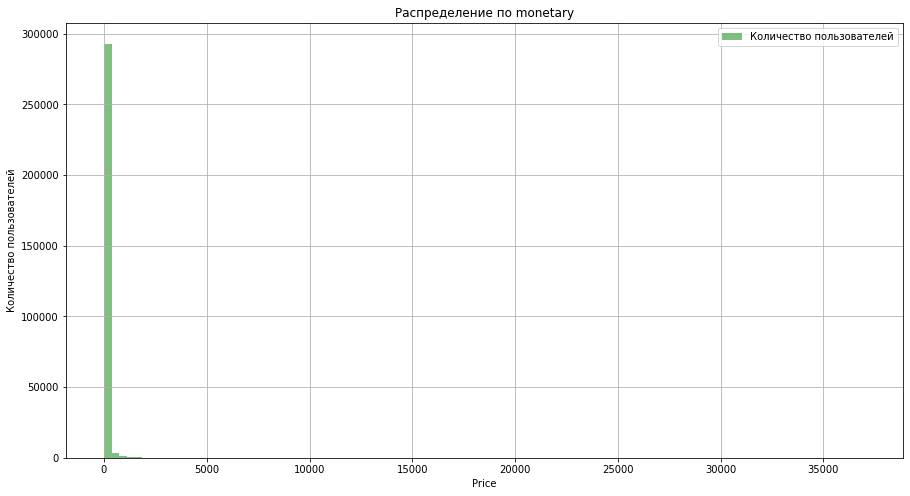

In [9]:
plt.figure(figsize=(15, 8))

plt.hist(
rfm['price'],
bins=100,
alpha=0.5,
color='green',
label='Количество пользователей'
)

plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('Price')
plt.title('Распределение по monetary')
plt.legend()
plt.show()

Почти все пользователи имеют нулевой `monetary`. И есть большие выбросы вправо. Построим гистрограмму без выбросов.

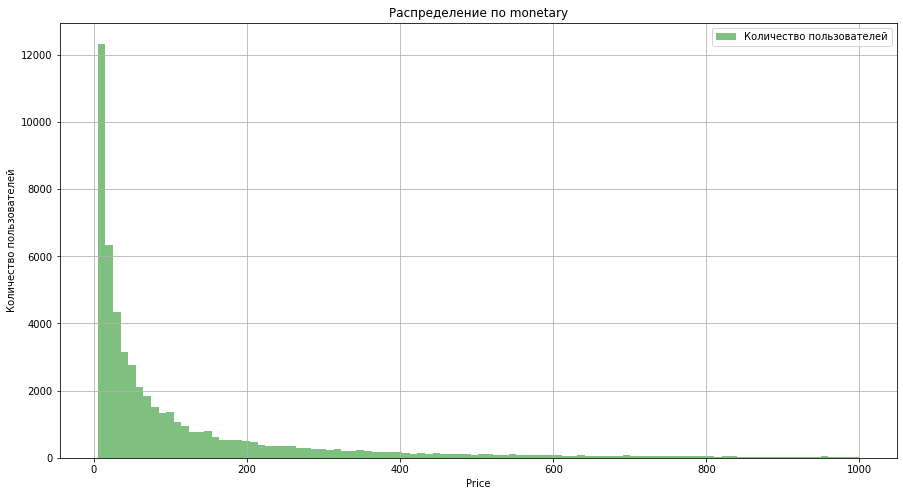

In [10]:
plt.figure(figsize=(15, 8))

plt.hist(
rfm[(rfm['price'] != 0) & (rfm['price'] < 1000)]['price'],
bins=100,
alpha=0.5,
color='green',
label='Количество пользователей'
)

plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('Price')
plt.title('Распределение по monetary')
plt.legend()
plt.show()

### Recency
Разобъём по квантилям

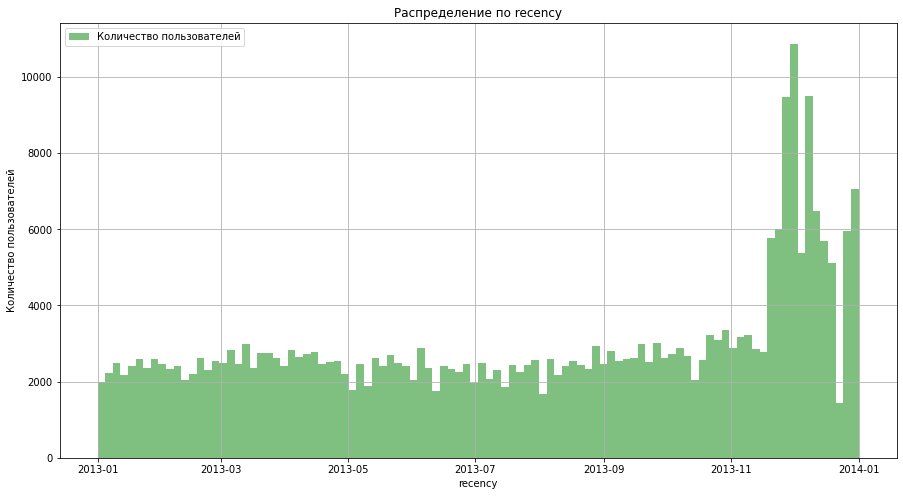

In [11]:
plt.figure(figsize=(15, 8))

plt.hist(
rfm['recency'],
bins=100,
alpha=0.5,
color='green',
label='Количество пользователей'
)

plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('recency')
plt.title('Распределение по recency')
plt.legend()
plt.show()

Так же построим без тех, кто заходил лишь один раз

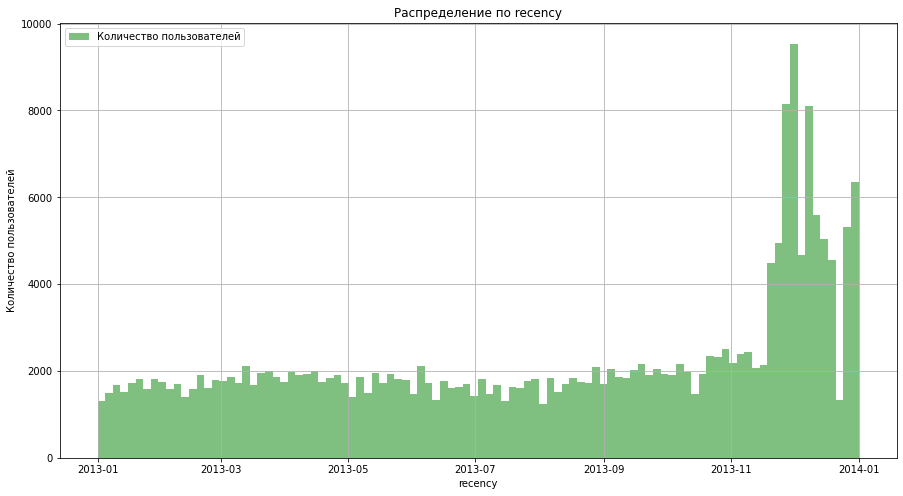

In [12]:
plt.figure(figsize=(15, 8))

plt.hist(
rfm[rfm['frequency'] != 1]['recency'],
bins=100,
alpha=0.5,
color='green',
label='Количество пользователей'
)

plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('recency')
plt.title('Распределение по recency')
plt.legend()
plt.show()

In [19]:
bounds = np.quantile(rfm['recency_ts'], q = [1/3, 2/3])

#set 2
rfm['recency_rate'] = [2 for i in rfm.index]

#set 3
rfm.loc[rfm.loc[:, 'recency_ts'] >= bounds[1], 'recency_rate'] = 3

#set 1
rfm.loc[rfm.loc[:, 'recency_ts'] <= bounds[0], 'recency_rate'] = 1

rfm

,price,frequency,recency,recency_ts,price_rate,recency_rate
user_id,,,,,,
00002ad98ae4290672431d702c211b4a,0.0,1,2013-09-24 23:55:43,1380052543,1,2
00003cb9076039f584a12c2036fd3602,0.0,19,2013-12-05 11:49:56,1386229796,1,3
000065938a8c02438551bef260a5ded0,0.0,7,2013-03-22 21:00:56,1363971656,1,1
000098543e00d361552ab956ec525772,0.0,1,2013-06-25 07:00:07,1372129207,1,2
0000d4b93e501f038977d4ae8fb7693b,0.0,2,2013-10-31 19:49:31,1383234571,1,3
...,...,...,...,...,...,...
ffff32de00441b07411d25b7c3adc8cc,0.0,1,2013-11-15 21:35:03,1384536903,1,3
ffffb9390285f56b4691aed5e3879663,0.0,37,2013-06-20 16:23:07,1371730987,1,2
ffffd6bd3a3f1e7b3b92a790104a6ae4,263.0,132,2013-04-08 09:48:53,1365400133,3,1


### Frequency

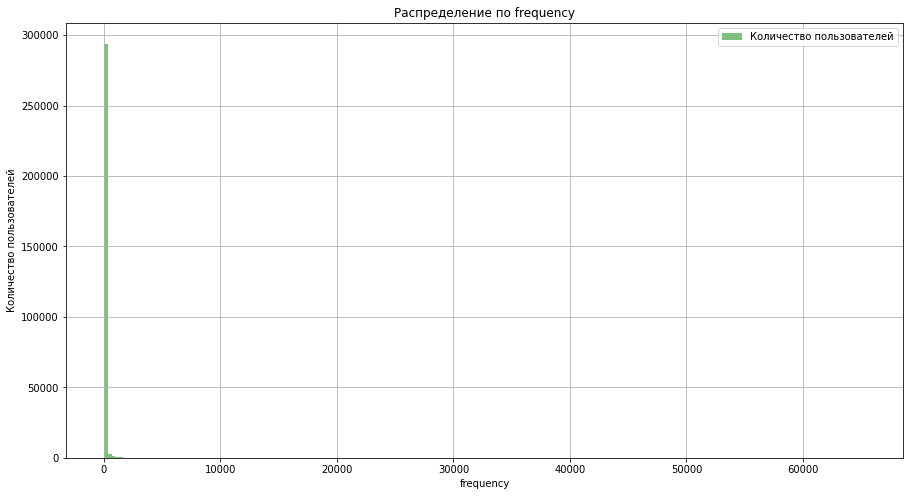

In [14]:
plt.figure(figsize=(15, 8))

plt.hist(
rfm['frequency'],
bins= 200,
alpha=0.5,
color='green',
label='Количество пользователей'
)

plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('frequency')
plt.title('Распределение по frequency')
plt.legend()
plt.show()

In [20]:
bounds_f = np.quantile(rfm['frequency'], q = [1/3, 2/3])

#set 2
rfm['frequency_rate'] = [2 for i in rfm.index]

#set 3
rfm.loc[rfm.loc[:, 'frequency'] >= bounds_f[1], 'frequency_rate'] = 3

#set 1
rfm.loc[rfm.loc[:, 'frequency'] <= bounds_f[0], 'frequency_rate'] = 1

rfm

,price,frequency,recency,recency_ts,price_rate,recency_rate,frequency_rate
user_id,,,,,,,
00002ad98ae4290672431d702c211b4a,0.0,1,2013-09-24 23:55:43,1380052543,1,2,1
00003cb9076039f584a12c2036fd3602,0.0,19,2013-12-05 11:49:56,1386229796,1,3,3
000065938a8c02438551bef260a5ded0,0.0,7,2013-03-22 21:00:56,1363971656,1,1,2
000098543e00d361552ab956ec525772,0.0,1,2013-06-25 07:00:07,1372129207,1,2,1
0000d4b93e501f038977d4ae8fb7693b,0.0,2,2013-10-31 19:49:31,1383234571,1,3,1
...,...,...,...,...,...,...,...
ffff32de00441b07411d25b7c3adc8cc,0.0,1,2013-11-15 21:35:03,1384536903,1,3,1
ffffb9390285f56b4691aed5e3879663,0.0,37,2013-06-20 16:23:07,1371730987,1,2,3
ffffd6bd3a3f1e7b3b92a790104a6ae4,263.0,132,2013-04-08 09:48:53,1365400133,3,1,3


## География пользователей
Посчитаем коэффициент `value1_frequency`, `value2_frequency` и `value3_frequency` для каждого региона, эти коэффициенты будут отражать долю пользователей с соответствующим рейтингом в регионе. Построим распределение по регионам.

Гипотеза: пользователь совершает действия из одного и того же региона, иначе выберем любой регион, из которого он совершал действия.

In [71]:
geo_rfm = rfm
geo_rfm['geo_id'] = main_data[['user_id', 'geo_id']].groupby(['user_id']).max()['geo_id']

In [73]:
geo_rfm = pd.merge(geo_rfm,geo_table,left_on='geo_id',right_on='id')

#clean rows
del geo_rfm['id'], geo_rfm['TZ_OFFSET'] 

,price,frequency,recency,recency_ts,price_rate,recency_rate,frequency_rate,geo_id,name,parent_region_id,type
0,0.0,1,2013-09-24 23:55:43,1380052543,1,2,1,10000,Земля,NaN,0
1,0.0,19,2013-12-05 11:49:56,1386229796,1,3,3,10000,Земля,NaN,0
2,0.0,7,2013-03-22 21:00:56,1363971656,1,1,2,10000,Земля,NaN,0
3,0.0,2,2013-10-31 19:49:31,1383234571,1,3,1,10000,Земля,NaN,0
4,0.0,2,2013-11-28 06:17:51,1385605071,1,3,1,10000,Земля,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
294891,10.0,23,2013-09-07 22:43:53,1378579433,2,2,3,98599,Одинцовский район,1.0,10
294892,189.0,407,2013-07-07 00:43:34,1373143414,3,2,3,10938,Беломорск,99190.0,6
294893,102.0,23,2013-10-27 22:00:30,1382896830,3,3,3,20590,Усолье,99663.0,6
294894,77.0,268,2013-12-04 23:12:38,1386184358,3,3,3,16745,Ханья,104168.0,6


Приведём всe `geo_id` к `type = 5`

In [76]:
for index, value in geo_rfm['geo_id'].items():
    while geo_rfm.loc[index, 'type'] > 5:
        parent_id = geo_rfm.loc[index, 'parent_region_id']
        info_place = geo_table[geo_table['id'] == parent_id]
        geo_rfm.loc[index, 'type'] = float(info_place['type'])
        geo_rfm.loc[index, 'id'] = int(info_place['id'])
        geo_rfm.loc[index, 'parent_region_id'] = float(info_place['parent_region_id'])
        if geo_rfm.loc[index, 'type'] == 5:
            geo_rfm.loc[index, 'name'] = info_place.iloc[0, 1]


In [77]:
geo_rfm

,price,frequency,recency,recency_ts,price_rate,recency_rate,frequency_rate,geo_id,name,parent_region_id,type,id
0,0.0,1,2013-09-24 23:55:43,1380052543,1,2,1,10000,Земля,NaN,0.0,NaN
1,0.0,19,2013-12-05 11:49:56,1386229796,1,3,3,10000,Земля,NaN,0.0,NaN
2,0.0,7,2013-03-22 21:00:56,1363971656,1,1,2,10000,Земля,NaN,0.0,NaN
3,0.0,2,2013-10-31 19:49:31,1383234571,1,3,1,10000,Земля,NaN,0.0,NaN
4,0.0,2,2013-11-28 06:17:51,1385605071,1,3,1,10000,Земля,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
294891,10.0,23,2013-09-07 22:43:53,1378579433,2,2,3,98599,Москва и Московская область,3.0,5.0,1.0
294892,189.0,407,2013-07-07 00:43:34,1373143414,3,2,3,10938,Республика Карелия,17.0,5.0,10933.0
294893,102.0,23,2013-10-27 22:00:30,1382896830,3,3,3,20590,Пермский край,40.0,5.0,11108.0
294894,77.0,268,2013-12-04 23:12:38,1386184358,3,3,3,16745,Крит,246.0,5.0,104168.0


Далее оставим только пользователей с `type = 5`, регионы с количеством пользователей большим, чем 100. Простроим распределение среднего `frequency_rate` по регионам

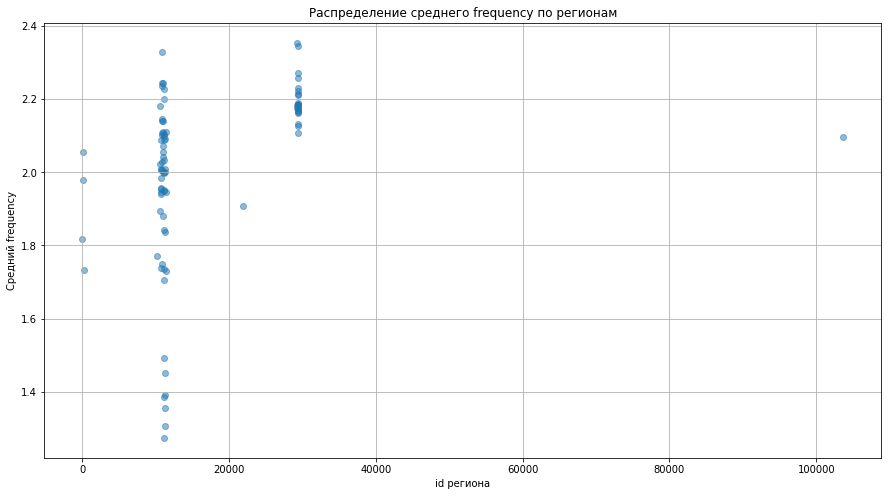

In [104]:
num_users =  geo_rfm.groupby('name').count()
names = pd.DataFrame(num_users[num_users['id'] >= 100].index)

hist_rfm = geo_rfm.groupby('name').mean()
hist_rfm = pd.merge(hist_rfm,names,left_on='name', right_on='name')
hist_rfm

plt.figure(figsize=(15, 8))

plt.scatter(
    hist_rfm['id'],
    hist_rfm['frequency_rate'],
    alpha=0.5
)

plt.title('Распределение среднего frequency по регионам')
plt.ylabel('Средний frequency')
plt.xlabel('id региона')
plt.grid()
plt.show()

Видим, что есть регионы, в которых `frequency` больше, чем в остальных. Выясним, что это за регионы.

In [108]:
hist_rfm.sort_values(by='frequency_rate', ascending=False).head(10)[['name', 'price_rate', 
                                                                     'recency_rate', 'frequency_rate']]

,name,price_rate,recency_rate,frequency_rate
82,Штат Флорида,1.080292,2.956204,2.354015
63,Штат Вирджиния,1.039062,2.984375,2.343750
35,Псковская область,1.620438,1.868613,2.328467
67,Штат Индиана,1.067669,2.984962,2.270677
69,Штат Кентукки,1.047619,3.000000,2.257143
39,Республика Коми,1.530201,1.993289,2.244966
25,Мурманская область,1.542735,1.880342,2.243590
1,Архангельская область,1.552727,1.865455,2.236364
64,Штат Висконсин,1.068376,2.982906,2.230769
58,Ханты-Мансийский автономный округ - Югра,1.018816,1.806823,2.228612


## Идеи по увеличению `frequency_rate`
- Во-первых, настраивать таргет и привлекать новых пользователей из регионов, указанных выше. В этих регионах у людей выше частота контакта. Привлекая новых пользователей из этих регионов, будет повышаться средняя частота контакта пользователей, а следовательно и LTV.
- Во-вторых, из 10 регионов в топе 5 находятся в США. Возникает идея поиска новых партнёров-магазинов в США и осваивание новых рынков за пределами России.

## Оценка полезности
---------------------------------
Проверим следующую гипотезу:
- увеличение `frequency_rate` действительно влечёт увеличение `price_rate` (или LTV)

Выясним следующий вопрос:
- на сколько нужно увеличить `frequency_rate`, чтобы увеличить `price_rate` на заданное число?

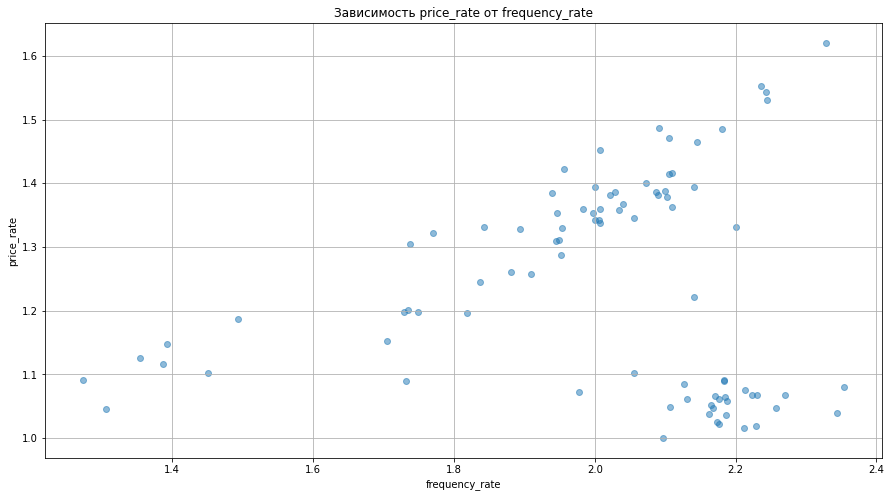

In [110]:
plt.figure(figsize=(15, 8))

plt.scatter(
    hist_rfm['frequency_rate'],
    hist_rfm['price_rate'],
    alpha=0.5
)

plt.title('Зависимость price_rate от frequency_rate')
plt.ylabel('price_rate')
plt.xlabel('frequency_rate')
plt.grid()
plt.show()

### Замечание:
- точки в действительности ложатся на линейную регрессию, но есть группа точек, которая лежит ниже её. Гипотеза: эти точки соответствуют заграничным регионам, в частности США.

In [111]:
strange_points = hist_rfm[hist_rfm['price_rate'] < 5/6*hist_rfm['frequency_rate'] - 0.5]
strange_points

,name,price,frequency,recency_ts,price_rate,recency_rate,frequency_rate,parent_region_id,type,id
9,Ереван,237.377953,530.346457,1.372934e+09,1.102362,1.811024,2.055118,166.0,3.0,168.0
13,Калининградская область,10.489933,19.114094,1.374047e+09,1.221477,1.926174,2.140940,17.0,5.0,10857.0
28,Округ Колумбия,0.000000,6.988914,1.385472e+09,1.000000,2.951220,2.097561,84.0,5.0,103666.0
50,Ташкент,3.145251,23.072626,1.371441e+09,1.072626,1.681564,1.977654,166.0,3.0,171.0
56,Ульяновская область,28.933071,42.070866,1.373984e+09,1.330709,1.893701,2.200787,40.0,5.0,11153.0
58,Ханты-Мансийский автономный округ - Югра,1.513761,10.042029,1.373036e+09,1.018816,1.806823,2.228612,52.0,5.0,11193.0
61,Штат Алабама,2.489362,7.297872,1.386028e+09,1.063830,2.964539,2.184397,84.0,5.0,29318.0
62,Штат Вашингтон,9.269231,8.969231,1.385742e+09,1.061538,2.961538,2.130769,84.0,5.0,29364.0
63,Штат Вирджиния,1.429688,8.281250,1.385916e+09,1.039062,2.984375,2.343750,84.0,5.0,29363.0
64,Штат Висконсин,4.008547,8.820513,1.386072e+09,1.068376,2.982906,2.230769,84.0,5.0,29366.0


Гипотеза подтвердилась. Почти все точки -- штаты США. В конце попробуем объяснить этот эффект, пока построим регрессию без этих точек.

Параметры линейной зависимости:
 
0.4673 x + 0.4327


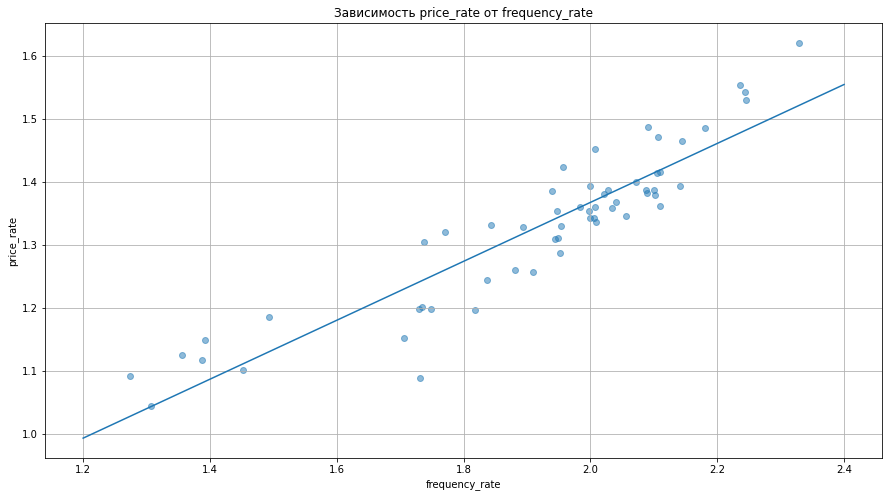

In [121]:
data_for_plot = hist_rfm[hist_rfm['price_rate'] > 5/6*hist_rfm['frequency_rate'] - 0.5]

plt.figure(figsize=(15, 8))

plt.scatter(
    data_for_plot['frequency_rate'],
    data_for_plot['price_rate'],
    alpha=0.5
)

f_cash = np.polyfit(data_for_plot['frequency_rate'], data_for_plot['price_rate'], 1)
f = sp.poly1d(f_cash)
print('Параметры линейной зависимости:')
print(f)

grid = [1.2, 2.4]

plt.plot(
    grid,
    f(grid)
)

plt.title('Зависимость price_rate от frequency_rate')
plt.ylabel('price_rate')
plt.xlabel('frequency_rate')
plt.grid()
plt.show()

### Вывод:
- с повышением `frquency_rate` растёт `price_rate`, причём коэффициент пропорциональности порядка `0.4674`. Это означает, что если мы будет привлекать новых клиентов из регионов с повышенным `frequency_rate`, то у этих клиентов также будет выше и LTV, следовательно средний LTV будет повышаться.
- точки, которые оказались чуть ниже, можно объяснить тем, что в этих регионах недостаточно партнёров-магазинов. Пользователь много переходит по ссылкам, но не может найти нужный товар. Если получится завести новых партнёров и расширить рынок, то есть возможность поднять точки на графике ближе к прямой, что даёт допольнительное повышение LTV.

## Распределение пользователей по категориям